In [1]:
%matplotlib inline

In [2]:
import sys 
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import cv2

from blurnet.utils import dataloader

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    # plt.savefig('figure.png')  # added for saving the image
    plt.show()

In [4]:
trainloader, testloader, classes = dataloader(64)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

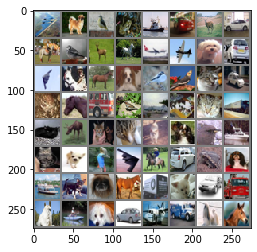

In [6]:
# show images
imshow(torchvision.utils.make_grid(images))

In [7]:
images.size()

torch.Size([64, 3, 32, 32])

In [8]:
img = images[56]

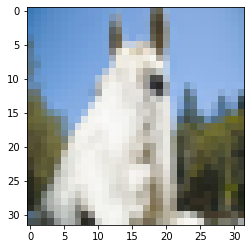

In [9]:
imshow(img)

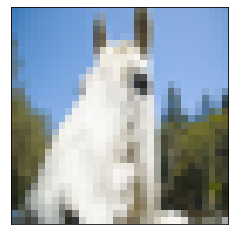

In [10]:
# show and save an image
# remove scales
img = img / 2 + 0.5     # unnormalize
npimg = img.numpy()
plt.xticks([])
plt.yticks([])
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.savefig('figure.png')  # added for saving the image
plt.show()

---
# cv2.GaussianBlur
dalaloaderによって複数の画像が出力される。(32,32)で小さい。  
しかし、cv2.GaussianBlurは一枚ずつ（のはず）。

In [11]:
# img = img / 2 + 0.5 
npimg = img.numpy()

In [12]:
npimg.shape

(3, 32, 32)

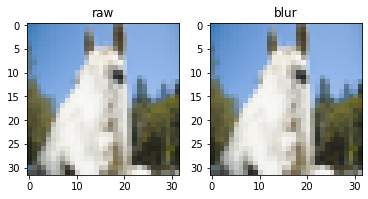

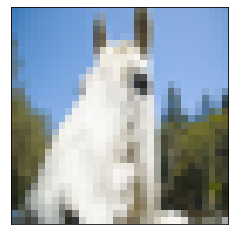

In [40]:
kernel_size=(1, 1)
sigma= 100
blurfile = 'blur_s1_k3-3.png'
blur = cv2.GaussianBlur(npimg.transpose(1, 2, 0), kernel_size, sigma)
# cv2.imwrite('./blur_s3_k9-9.png', blur)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(npimg.transpose(1, 2, 0))
axes[0].set_title('raw')
axes[1].imshow(blur)
axes[1].set_title('blur')
plt.savefig('./compare.png')
plt.show(fig)
# show and save an image
#plt.figure(figsize=(32,32))
# plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.xticks([])
plt.yticks([])
plt.imshow(blur)
plt.savefig(blurfile)  # added for saving the image
plt.show()


In [41]:
np.square(npimg.transpose(1, 2, 0) - blur).sum()

0.0

In [42]:
np.allclose(npimg.transpose(1, 2, 0), blur)

True

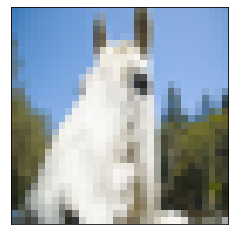

In [16]:
plt.xticks([])
plt.yticks([])
plt.imshow(npimg.transpose(1, 2, 0))
plt.savefig('raw_cat.png')  # added for saving the image
plt.show()

# 関数作成
`GaussianBlur_images`は複数の画像をぼかす。

In [17]:
def GaussianBlur_images(imgs, kernel_size, sigma):
    npimgs = imgs.numpy()
    imgs_list = []
    for img in npimgs:
         imgs_list.append(cv2.GaussianBlur(img.transpose(1, 2, 0), kernel_size, sigma))
    blurred_imgs = np.array(imgs_list)
    blurred_imgs = blurred_imgs.transpose(0, 3, 1, 2)
    return  torch.from_numpy(blurred_imgs)  # shape=(4, 3, 32, 32)

In [18]:
images, labels = dataiter.next()

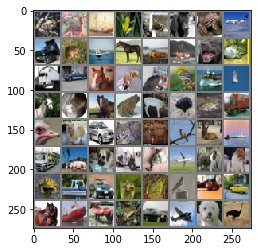

In [19]:
imshow(torchvision.utils.make_grid(images))

In [20]:
b_imgs = GaussianBlur_images(images, kernel_size=(1, 1), sigma=0)

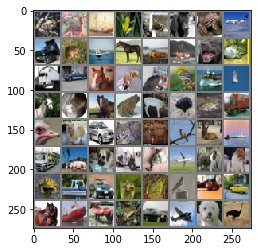

In [21]:
imshow(torchvision.utils.make_grid(b_imgs))

In [19]:
images = images / 2 + 0.5  # unnormalize
npimgs = images.numpy()  

In [20]:
b_imgs = b_imgs / 2 + 0.5  # unnormalize
b_npimgs = b_imgs.numpy()

In [21]:
def show_images(raw, blurred):
    num = raw.shape[0]  # number of images
    fig, axes = plt.subplots(num, 2)
    axes[0][0].set_title('raw')
    axes[0][1].set_title('blurred')
    for i in range(num):
        axes[i][0].imshow(raw[i].transpose(1, 2, 0))
        axes[i][1].imshow(blurred[i].transpose(1, 2, 0))
    plt.show(fig)

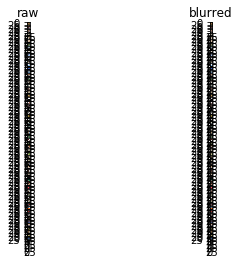

In [22]:
show_images(npimgs, b_npimgs)

In [23]:
b_imgs.type()

'torch.FloatTensor'

# torch tensorをそのままぼかす
無理だった